## Summary
The notebook gives a summary of the Week 2 Assignment 3 of Data Visualization, which is about exploring data sets and plotting scatter plots and histograms.

## Introduction

I downloaded a csv data and load it into dataframe object( pandas  read function was used for that). I explored the data about dutch cities. In the end I compared dutch cities population with the rest of the world.

 Done by Nikolay Polyanov

In [1]:
import urllib.request as urllib, zipfile, os
import pandas as pd

# Specifying from where to downloading the desired file
url = 'http://download.maxmind.com/download/worldcities/'
filename = 'worldcitiespop.txt.gz'
datafolder = 'data/'

#Load the url in a variable
downloaded = urllib.urlopen(url + filename)
#Read the file and stores it in buf
buf = downloaded.read()

#Creates a binary file, opens it, stores the info, closes after finish
with open(datafolder + filename,'wb') as f:
    f.write(buf)

cities = pd.read_csv(datafolder + filename, sep = ',', low_memory = False, encoding = 'ISO-8859-1')
cities.tail()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
3173953,zw,zimre park,Zimre Park,04,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,00,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,04,NaN,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,06,NaN,-20.033333,27.933333
3173957,zw,zvishavane,Zvishavane,07,79876,-20.333333,30.033333


### Data manipulation
Now we can clearly see that most of the population is specified as NaN - Not a number due to the fact that these are the final rows. 

In [2]:
cities.sort(columns = 'Population', ascending = False).head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
1544449,jp,tokyo,Tokyo,40,31480498,35.685000,139.751389
570824,cn,shanghai,Shanghai,23,14608512,31.045556,121.399722
1327914,in,bombay,Bombay,16,12692717,18.975000,72.825833
2200161,pk,karachi,Karachi,05,11627378,24.905600,67.082200
1349146,in,new delhi,New Delhi,07,10928270,28.600000,77.200000


## Assignment A
Make a scatter plot of the position of all the cities in the dataset.

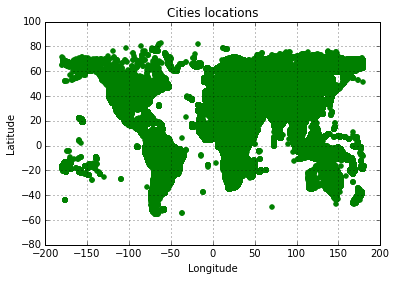

In [3]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure()
plt.scatter(cities['Longitude'], cities['Latitude'], color = 'green')
plt.title('Cities locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## Assignment B
Make a scatter plot of the cities in the Netherlands. But now vary the size of the marker and the color according to the population of the city.
Colorbar will be also added as a legend to show relation between the color and the population.

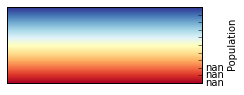

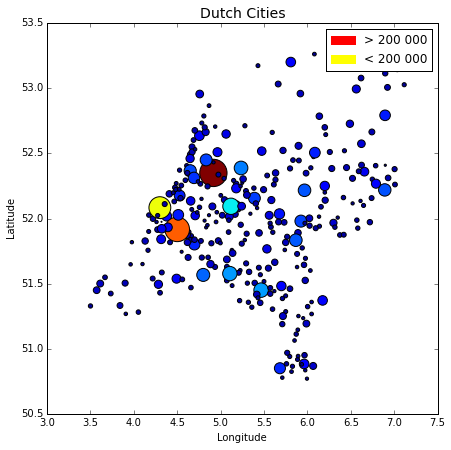

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

dutch_cities = cities[cities['Country'] == 'nl']
# setting the size of the marker according to the population
s = [x/1000 for x in dutch_cities['Population'] ]

fig = plt.figure(figsize=(3,7))
plt.figure(figsize = [7,7])



red_patch = mpatches.Patch(color = 'red', label = '> 200 000')
yellow_patch = mpatches.Patch(color = 'yellow', label = '< 200 000')

c = dutch_cities['Population']

cmap = matplotlib.cm.RdYlBu
norm = matplotlib.colors.Normalize(vmin = min(c), vmax = max(c))

ax1 = fig.add_axes([0.80,0.05 , 0.9, 0.15])
cb1 = matplotlib.colorbar.ColorbarBase(ax1, cmap = cmap, norm=norm, orientation='vertical')
cb1.set_label('Population')

minPop = min(dutch_cities['Population'])
maxPop = max(dutch_cities['Population'])

cb1.ax.set_yticklabels([minPop, (minPop+maxPop)/2, maxPop])

plt.scatter(dutch_cities['Longitude'], dutch_cities['Latitude'], s = s, c = c)
plt.title('Dutch Cities', fontsize = 14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
h = plt.legend(handles = [red_patch, yellow_patch])
#v = get(h, 'title')
#set(v, 'string', 'Population') # set legend title
plt.show()

## Assignment C
In the above plot we can clearly see which are the large cities in Netherlands. But not how many big cities there are. We will use a histogram plot to show a distribution.

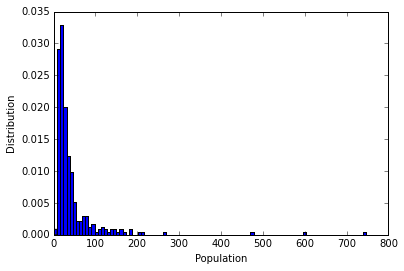

In [24]:
plt.figure()
plt.hist(np.asarray(dutch_cities.dropna().Population/1000), 100, normed=1)
plt.xlabel('Population')
plt.ylabel('Distribution')
plt.show()

## Assignment D
Now we will compare the distribution of Dutch cities with the rest of the world.
We will use subplots to show the dutch distribution(top plot) and the world distribution (bottom plot).

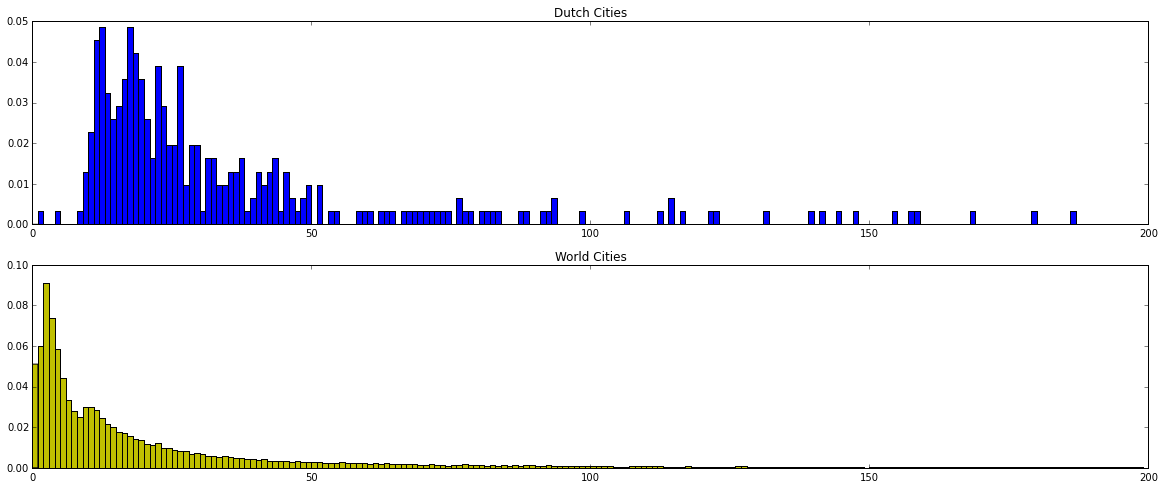

In [33]:
fig = plt.figure(figsize=[20,8])
ax = fig.add_subplot(2,1,1)
plt.hist(np.asarray(dutch_cities.dropna().Population/1000), bins=np.arange(0,200,1),normed=1,color='b')
ax.set_title('Dutch Cities')
ax = fig.add_subplot(2,1,2)
plt.hist(np.asarray(cities.dropna().Population/1000), bins=np.arange(0,200,1), normed=1, color='y')
ax.set_title('World Cities')

## Assignment E - Conclusion
From the above plots, we can conclude that most of the cities in Netherlands are with population between 20 000 and 50 000. Where as in the rest of the world - between 5 000 and 15 000.